In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import datetime

In [3]:
turbina = pd.read_csv('T1.csv')

In [4]:
turbina

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [5]:
turbina.columns = ['Data/hora', 'PotênciaAtiva(KW/h)', 'VelocidadeVento(m/s)', 'CurvaTeorica(KW/h)', 'DireçãoVento(°)']
turbina

,Data/hora,PotênciaAtiva(KW/h),VelocidadeVento(m/s),CurvaTeorica(KW/h),DireçãoVento(°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [7]:
del turbina['DireçãoVento(°)']

In [8]:
turbina

,Data/hora,PotênciaAtiva(KW/h),VelocidadeVento(m/s),CurvaTeorica(KW/h)
0,01 01 2018 00:00,380.047791,5.311336,416.328908
1,01 01 2018 00:10,453.769196,5.672167,519.917511
2,01 01 2018 00:20,306.376587,5.216037,390.900016
3,01 01 2018 00:30,419.645905,5.659674,516.127569
4,01 01 2018 00:40,380.650696,5.577941,491.702972
...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503


In [9]:
turbina['Data/hora']= pd.to_datetime(turbina['Data/hora'])
turbina

,Data/hora,PotênciaAtiva(KW/h),VelocidadeVento(m/s),CurvaTeorica(KW/h)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


In [12]:
data=datetime.date(2022,1,4)
print(data)

2022-01-04


In [13]:
print(data.ctime())

Tue Jan  4 00:00:00 2022


## plotando os dados em um gráfico - Real 


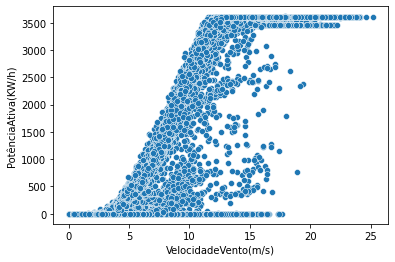

In [14]:
sns.scatterplot(data=turbina, x= 'VelocidadeVento(m/s)', y='PotênciaAtiva(KW/h)')

## plotando os dados em um gráfico - teórica

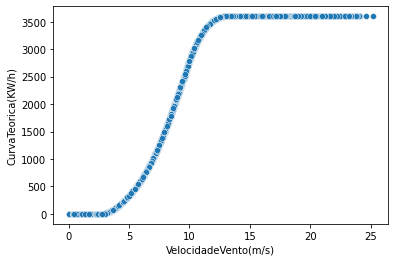

In [15]:
sns.scatterplot(data=turbina, x= 'VelocidadeVento(m/s)', y='CurvaTeorica(KW/h)')

## criando limites aceitáveis (neste gráfico iremos setar os 5% acima e os 5% abaixo de forma que 
## o gráfico tenha maior confiabilidade.) 

In [16]:
potencia_real=turbina['PotênciaAtiva(KW/h)'].tolist()
potencia_teorica=turbina['CurvaTeorica(KW/h)'].tolist()
print(potencia_real[0:15])

[380.047790527343, 453.76919555664, 306.376586914062, 419.645904541015, 380.650695800781, 402.391998291015, 447.605712890625, 387.2421875, 463.651214599609, 439.725708007812, 498.181701660156, 526.816223144531, 710.587280273437, 655.194274902343, 754.7625122070309]


In [18]:
## utilizando o for, passando por cada valor setando +5% e -5%

In [27]:
potencia_maxima=[]
potencia_minima=[]
dentro_limite = []

In [28]:
for potencia in potencia_teorica:
    potencia_maxima.append(potencia*1.05)
    potencia_minima.append(potencia*0.95)

## verificando se as listas de potencia maxima e potencia minima estão do mesmo tamanho da potencia teorica 

In [29]:
for p, potencia in enumerate(potencia_real):
    if potencia>=potencia_minima[p] and potencia<=potencia_maxima[p]:
        dentro_limite.append('Dentro')
    elif potencia==0:
        dentro_limite.append('Zero')
    else:
        dentro_limite.append('Fora')

In [30]:
print(dentro_limite.count('Dentro')/len(dentro_limite))

0.37286760340391845


Adicionando lista "dentro_limite" ao dataframe:

In [31]:
turbina['DentroLimite'] = dentro_limite
display(turbina)

,Data/hora,PotênciaAtiva(KW/h),VelocidadeVento(m/s),CurvaTeorica(KW/h),DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


Plotando novamente o gráfico:

In [32]:
cores={'Dentro':'blue','Fora':'red','Zero':'orange'}

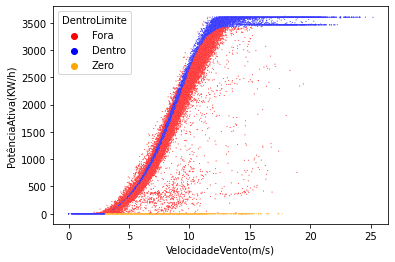

In [34]:
graf=sns.scatterplot(data=turbina, x='VelocidadeVento(m/s)', y='PotênciaAtiva(KW/h)',hue='DentroLimite', s=1,palette=cores)